# Correlation heatmaps 

using gene expression data

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(230, 20, as_cmap=True)

In [7]:
ge = pd.read_csv('data/breast_cancer/77_cancer_proteomes_CPTAC_itraq.csv')
ge = ge.drop(['gene_symbol', 'gene_name'], axis=1)
ge = ge.set_index('RefSeq_accession_number')
ge = ge.dropna()
ge

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
RefSeq_accession_number,,,,,,,,,,,,,,,,,,,,,
NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.106680,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.106680,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.106680,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.106680,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.106680,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP_003846524,2.654339,0.715535,0.160528,-8.716757,0.388225,1.496053,-3.694801,-0.870670,-0.743348,3.383894,...,1.300058,-4.105941,-3.620036,-2.598691,-2.462510,-5.083982,-4.792895,0.641854,-2.257159,-0.720976
NP_443073,-0.119194,1.144610,-1.203037,1.700762,0.371826,-1.718572,0.873949,-0.851479,0.787411,1.617433,...,-1.377869,0.821200,1.494581,3.259359,-0.109983,-2.698723,-0.294287,0.420100,0.226521,-0.537262
NP_001004456,-2.024094,-0.166903,-3.071010,2.353112,-1.445222,0.197769,4.618518,1.914760,3.158587,-2.820708,...,-2.785351,1.203922,-0.269946,1.233740,1.894022,-1.556297,0.724603,0.847382,0.520142,0.948084


---

`pd.df.corr()`: Compute pairwise correlation of columns. ([doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html))

`scipy.stats.pearsonr()`: Pearson correlation coefficient and p-value for testing non-correlation. `[1]` returns the pval for the corr. ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html))

`np.eye()`: Return a 2-D array with ones on the diagonal and zeros elsewhere.

`pd.df.applymap()`: Apply a function to a Dataframe elementwise. ([doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html))

1. get the pairwise corr between columns
2. get pairwise p-val of corr between columns, `-np.eye()` to set self corr p-vals to 0
3. get the p-vals with significance for every cell of df
4. get the annotation df by combining corr + p-val



In [8]:
corr_df = ge.corr()
pval = ge.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr_df.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
annot_df = corr_df.round(2).astype(str) + p

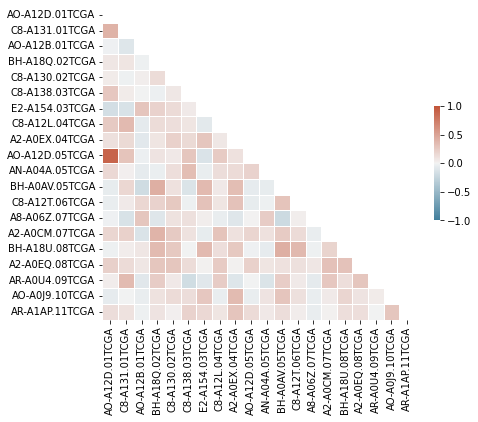

In [9]:
mask = np.triu(np.ones_like(corr_df.iloc[:20, :20], dtype=bool))

plt.figure(figsize=(7, 7))
sns.heatmap(corr_df.iloc[:20, :20], mask=mask,
        cmap=cmap, center=0, fmt='s',
        square=True, linewidths=0.5, 
        cbar_kws={"shrink": .3},
        annot_kws={"fontsize":8},
        vmin=-1, vmax=1)
plt.xlabel('');
# plt.savefig(fname='grouped_corr.jpg', bbox_inches='tight', dpi=300)

---


Can choose only a few columns to visualize:

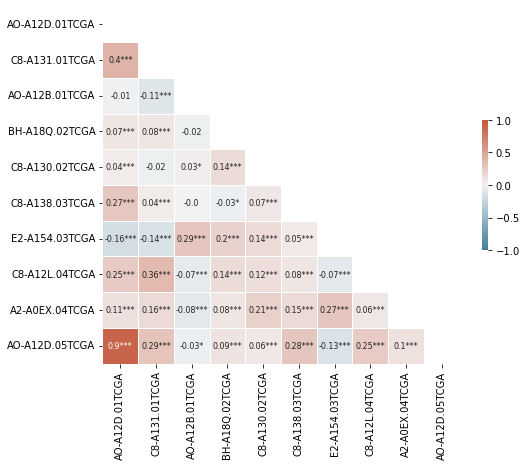

In [10]:
target_genes = ['AO-A12D.01TCGA', 'C8-A131.01TCGA', 'AO-A12B.01TCGA', 
                'BH-A18Q.02TCGA', 'C8-A130.02TCGA', 'C8-A138.03TCGA', 
                'E2-A154.03TCGA', 'C8-A12L.04TCGA', 'A2-A0EX.04TCGA', 
                'AO-A12D.05TCGA']

smol_corr_df = corr_df.loc[target_genes, target_genes]
smol_annot_df = annot_df.loc[target_genes, target_genes]

mask = np.triu(np.ones_like(smol_corr_df, dtype=bool))

plt.figure(figsize=(8,8))
sns.heatmap(smol_corr_df, annot=smol_annot_df, mask=mask,
        cmap=cmap, center=0, fmt='s',
        square=True, linewidths=0.5, 
        cbar_kws={"shrink": .3},
        annot_kws={"fontsize":8},
        vmin=-1, vmax=1)
plt.xlabel('');
# plt.savefig(fname='grouped_corr.jpg', bbox_inches='tight', dpi=300)

---


The above can look too crowded and cluttered; so a filter for absolute corr value makes for a claner looking plot.

Text(0.5, 15.0, '')

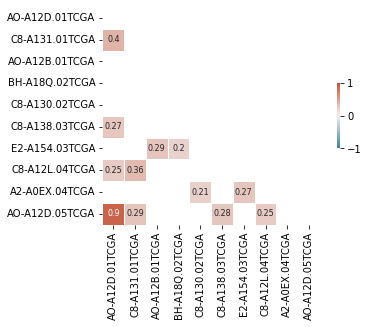

In [11]:
smol_corr_df = corr_df.loc[target_genes, target_genes]
smol_annot_df = annot_df.loc[target_genes, target_genes]

corr_th = 0.2
smol_corr_df_ = smol_corr_df[np.abs(smol_corr_df) >= corr_th]
smol_annot_df_ = smol_corr_df_.round(2).fillna('').astype(str)
mask = np.triu(np.ones_like(smol_corr_df_, dtype=bool))
sns.heatmap(smol_corr_df_, annot=smol_annot_df_, mask=mask,
        cmap=cmap, center=0, fmt='s',
        square=True, linewidths=0.5, 
        cbar_kws={"shrink": .3},
        annot_kws={"fontsize":8},
        vmin=-1, vmax=1)
plt.xlabel('')
# plt.savefig(fname='grouped_corr.jpg', bbox_inches='tight', dpi=300)

---

Questions:

1. How does pd implement the pair-wise correlation of columns?

---
